In [1]:
import pandas as pd


In [2]:
# Define the path to your CSV file
file_path = 'penguins_binary_classification.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen            36.7           19.3              193.0   
4  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g  year  
0       3750.0  2007  
1       3800.0  2007  
2       3250.0  2007  
3       3450.0  2007  
4       3650.0  2007  


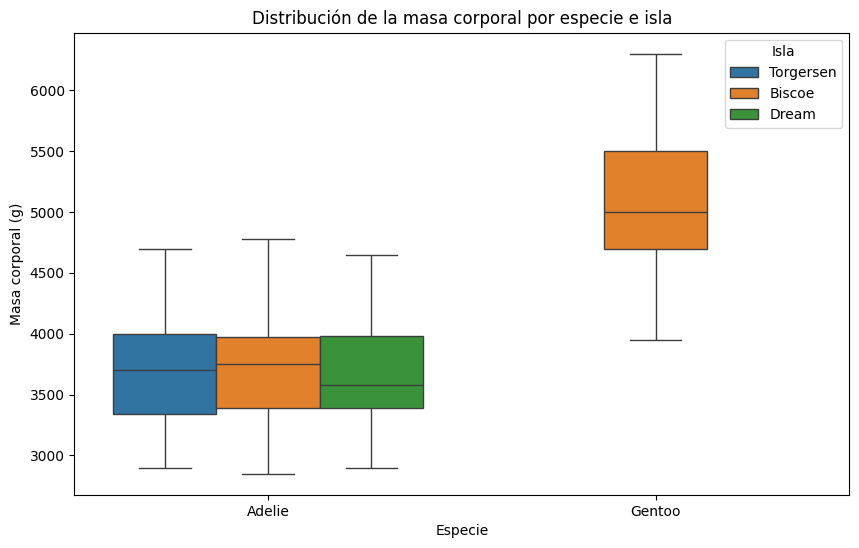

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráfico de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='species', y='body_mass_g', hue='island')
plt.title('Distribución de la masa corporal por especie e isla')
plt.xlabel('Especie')
plt.ylabel('Masa corporal (g)')
plt.legend(title='Isla')
plt.show()

In [4]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Suprimir advertencias de Seaborn
warnings.filterwarnings(action='ignore', category=UserWarning, module='seaborn')

# Asegurarse de que las bibliotecas estén importadas


In [10]:
print(df['island'].unique())


['Torgersen' 'Biscoe' 'Dream']


Columnas en el DataFrame: Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'year'],
      dtype='object')
  species     island  body_mass_g
0  Adelie  Torgersen       3750.0
1  Adelie  Torgersen       3800.0
2  Adelie  Torgersen       3250.0
3  Adelie  Torgersen       3450.0
4  Adelie  Torgersen       3650.0
Valores únicos en 'island': ['Torgersen' 'Biscoe' 'Dream']


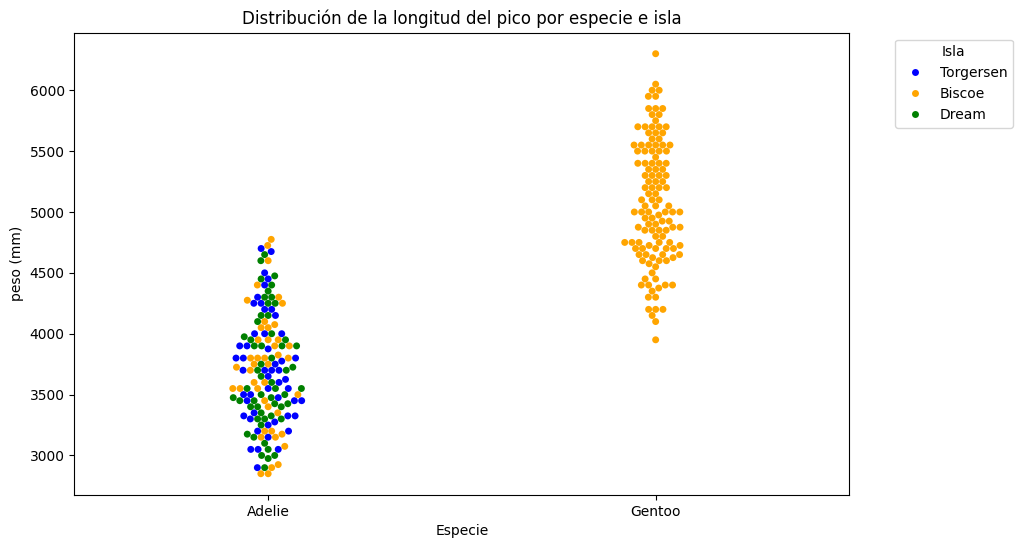

In [12]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Suprimir advertencias de Seaborn
warnings.filterwarnings(action='ignore', category=UserWarning, module='seaborn')

# Verificar las columnas del DataFrame
print("Columnas en el DataFrame:", df.columns)

# Comprobar algunas filas de las columnas relevantes
print(df[['species', 'island', 'body_mass_g']].head())

# Verificar los valores únicos en la columna 'island'
island_values = df['island'].unique()
print("Valores únicos en 'island':", island_values)

# Ajustar el diccionario de la paleta
palette = {
    'Torgersen': 'blue',
    'Biscoe': 'orange',
    'Dream': 'green'
}

# Comprobar que todas las claves están en el diccionario palette
for value in island_values:
    if value not in palette:
        print(f"Falta la clave '{value}' en el diccionario palette")

# Crear un swarmplot para visualizar la longitud del pico por especie y isla
if 'body_mass_g' in df.columns and 'species' in df.columns and 'island' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.swarmplot(x="species", y="body_mass_g", hue="island", data=df, palette=palette)
    
    # Añadir título y etiquetas
    plt.title('Distribución de la longitud del pico por especie e isla')
    plt.xlabel('Especie')
    plt.ylabel('peso (mm)')
    
    # Mostrar la leyenda fuera del gráfico
    plt.legend(title='Isla', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Mostrar el gráfico
    plt.show()
else:
    print("Una o más de las columnas necesarias no están presentes en el DataFrame.")


In [22]:
import pandas as pd

# Calculamos la matriz de correlación
correlation_matrix = df_encoded.corr()

# Encontramos las correlaciones absolutas más altas (excluyendo la diagonal de 1's)
high_correlations = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_correlations = high_correlations[high_correlations != 1].drop_duplicates()

# Filtramos las correlaciones cercanas a 1 (puedes ajustar el umbral)
threshold = 0.8
close_to_one = high_correlations[high_correlations > threshold]

print("Correlaciones cercanas a 1:")
print(close_to_one)


Correlaciones cercanas a 1:
species_Gentoo     flipper_length_mm    0.901796
flipper_length_mm  species_Adelie       0.901796
body_mass_g        flipper_length_mm    0.882262
bill_length_mm     body_mass_g          0.876905
                   flipper_length_mm    0.869026
                   species_Gentoo       0.835687
                   species_Adelie       0.835687
bill_depth_mm      species_Gentoo       0.832606
species_Adelie     bill_depth_mm        0.832606
species_Gentoo     body_mass_g          0.819837
body_mass_g        species_Adelie       0.819837
dtype: float64


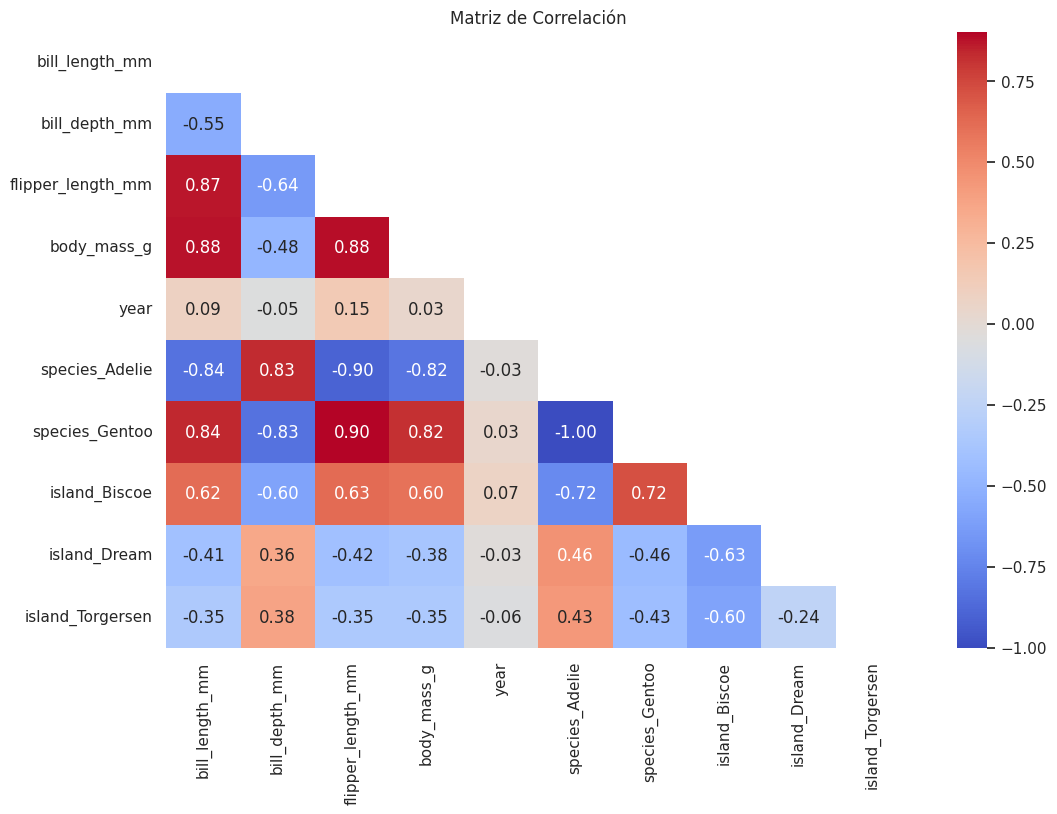

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Importar numpy

# Calcula la matriz de correlación
correlation_matrix = df_encoded.corr()

# Crea una máscara para ocultar la mitad superior del triángulo (es redundante)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configura el estilo visual de seaborn
sns.set(style="white")

# Crea la figura y el gráfico de calor
plt.figure(figsize=(12, 8))  
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()



In [3]:
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

# Realizar la codificación de etiquetas para las columnas 'species' e 'island'
df['species'] = label_encoder.fit_transform(df['species'])
df['island'] = label_encoder.fit_transform(df['island'])

# Ver el DataFrame actualizado
print(df)


     species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0          0       2            39.1           18.7              181.0   
1          0       2            39.5           17.4              186.0   
2          0       2            40.3           18.0              195.0   
3          0       2            36.7           19.3              193.0   
4          0       2            39.3           20.6              190.0   
..       ...     ...             ...            ...                ...   
269        1       0            47.2           13.7              214.0   
270        1       0            46.8           14.3              215.0   
271        1       0            50.4           15.7              222.0   
272        1       0            45.2           14.8              212.0   
273        1       0            49.9           16.1              213.0   

     body_mass_g  year  
0         3750.0  2007  
1         3800.0  2007  
2         3250.0  2007  
3         3

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression

# Suponiendo que df ya está cargado y contiene los datos de los pingüinos

# Definir las características (X) y la etiqueta (y)
# X son todas las columnas excepto 'species'
X = df[df.columns.difference(['species'])]

# y es la columna 'species'
y = df['species']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entrenar un modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Evaluar el modelo y mostrar los resultados
print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_test, predictions, average='weighted'))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        27

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

Predicted labels:  [1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1
 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1]
F1-score:  1.0


Cross-Validation F1 Scores: [1.         1.         1.         1.         0.98151351]
Mean CV F1 Score: 0.9963027018717092


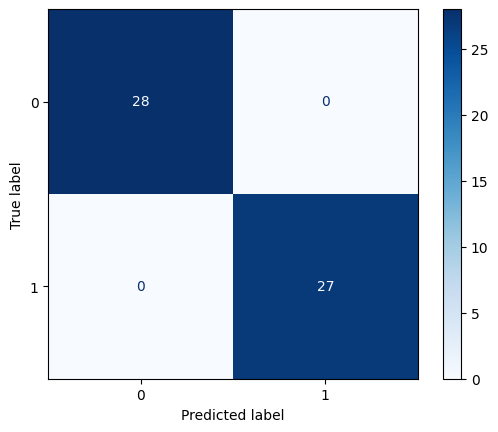

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Validación Cruzada
cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Mean CV F1 Score: {cv_scores.mean()}')

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


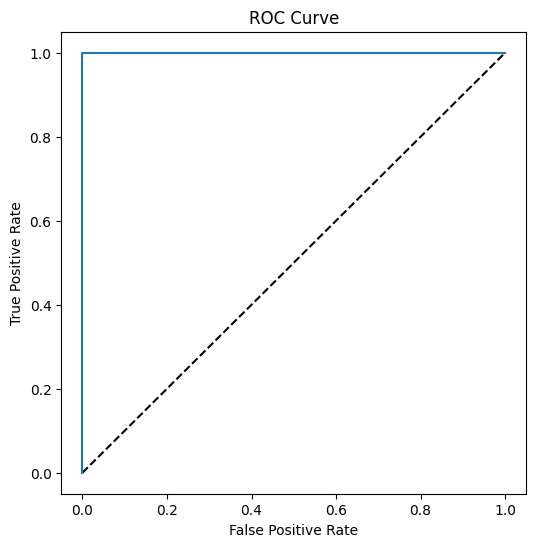

AUC: 1.0


In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Suponiendo que df ya está cargado y contiene los datos de los pingüinos

# Definir las características (X) y la etiqueta (y)
X = df[df.columns.difference(['species'])]
y = df['species']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entrenar un modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtener las probabilidades de predicción
y_scores = model.predict_proba(X_test)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

# Trazar la curva ROC
fig = plt.figure(figsize=(6, 6))
# Dibujar la línea diagonal (50% line)
plt.plot([0, 1], [0, 1], 'k--')
# Dibujar FPR y TPR logrados por nuestro modelo
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calcular y mostrar el AUC
auc = roc_auc_score(y_test, y_scores[:, 1])
print(f'AUC: {auc}')
